# Задача X.8.3

Условие: Решить систему дифференциальных уравнений на интервале $[0,10]$:
$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & u' = 998u + 1998 v \\
      & v' = -999u - 1999v 
    \end{aligned}
  \right.
\end{equation*}
$$
с начальными значениями $u(0) = v(0) = 1$ явным и неявным методами Эйлера, решение сравнить с точным решением. На основании проведенных
расчетов определить условие монотонности явного метода Эйлера.

Начнем с точного решения этого уравнения:

$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & u(t) = 4e^{-t} -3e^{-1000t} \\
      & v(t) = -2e^{-t} + 3e^{-1000t} 
    \end{aligned}
  \right.
\end{equation*}
$$

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def accurate_solution(t: float):
    u = 4 * np.exp(-1*t) - 3*np.exp(-1000*t)
    v = -2 * np.exp(-1*t) + 3*np.exp(-1000*t)

    return np.array([u, v])

Далее перейдем к решению явным методом Эйлера:

In [66]:

B = np.array([[998, 1998], [-999, -1999]])

def explicit_euler_method(u_0 : np.array, t_start : float, t_end : float, h : float):
    size = u_0.ndim
    t_list = np.arange(t_start, t_end + h, h)
    u_list = [u_0]

    for i in range(len(t_list) - 1):
        u_next = np.dot((np.eye(size) + h * B), u_list[-1])
        u_list.append(u_next)
    return np.array(t_list), np.array(u_list)


Неявный метод Эйлера:

In [67]:
def implicit_euler_method(u_0 : np.array, t_start : float, t_end : float, h : float):
    size = u_0.ndim
    t_list = np.arange(t_start, t_end + h, h)
    u_list = [u_0]

    for i in range(len(t_list) - 1):
        u_next = np.dot(np.linalg.inv((np.eye(size) + h * B)), u_list[-1])
        u_list.append(u_next)
    return np.array(t_list), np.array(u_list)


Функция для построения графиков наших решений:

In [68]:
def plot_graph(x_data, y_data, title):
    plot_data = []
    for i in range(len(x_data)):
        plot_data.append(y_data[i][0])
    plot_data = np.array(plot_data)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(x_data, plot_data)
    ax1.grid()
    ax1.set_xlabel("t")
    ax1.set_ylabel("u(t)")
    

    plot_data = []
    for i in range(len(x_data)):
        plot_data.append(y_data[i][1])
    plot_data = np.array(plot_data)

    ax2.plot(x_data, plot_data)
    ax2.grid()
    ax2.set_xlabel("t")
    ax2.set_ylabel("v(t)")

    fig.suptitle(title)
    plt.tight_layout()

    plt.show()

Сравним полученные решения с точным:

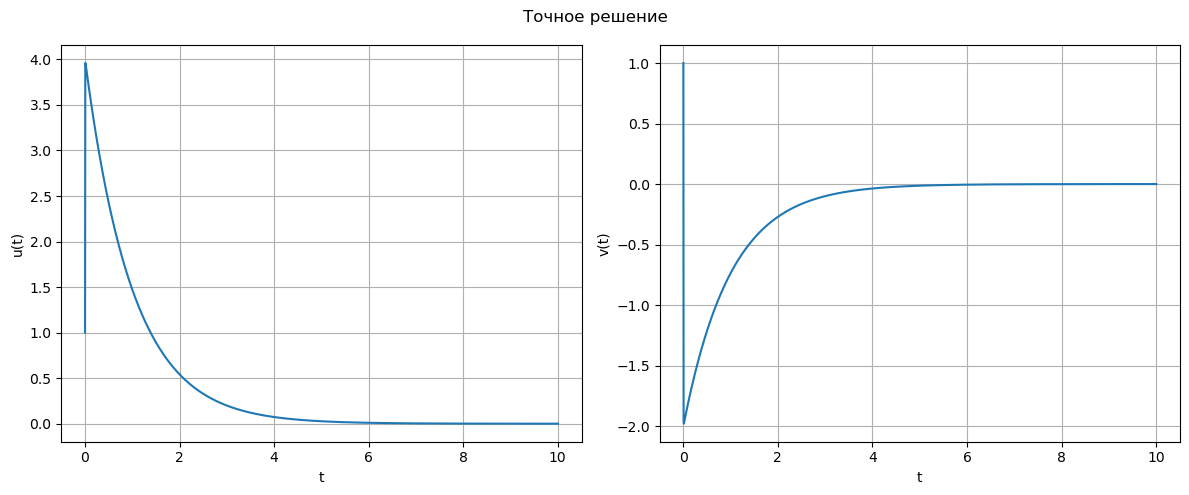

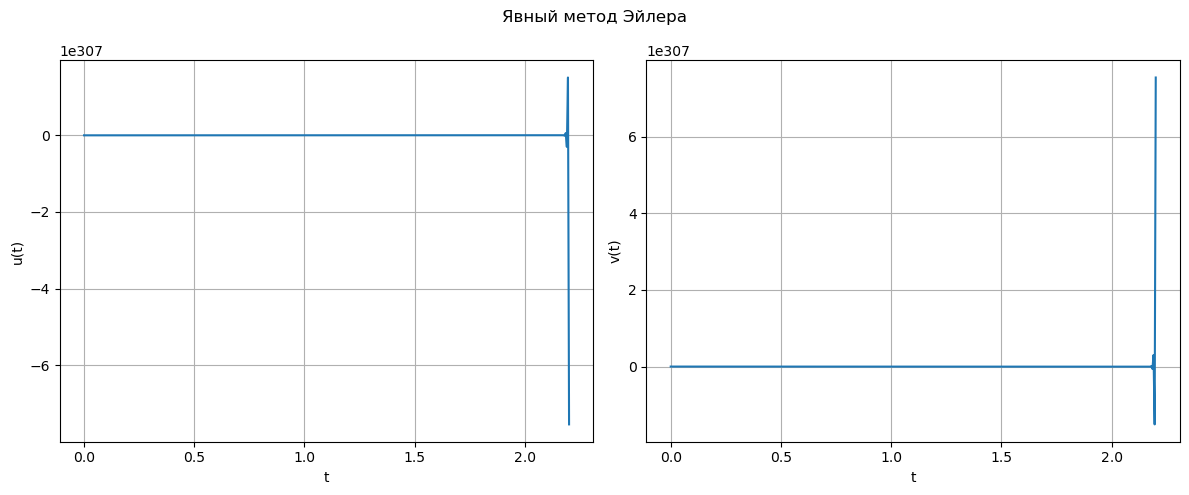

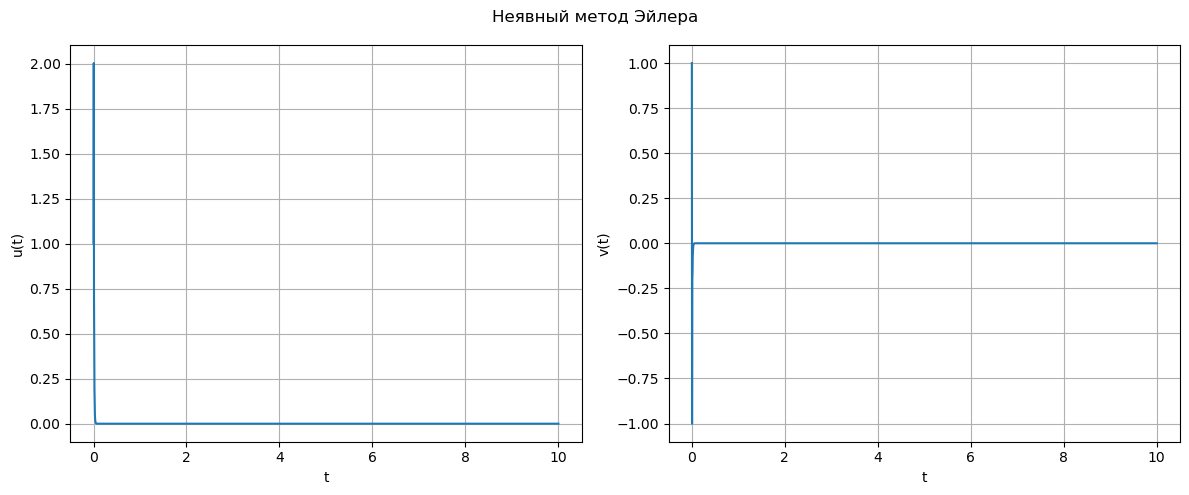

In [69]:
u_0 = np.array([1, 1])
t_start = 0
t_end = 10
h = 0.005


t, u_exp = explicit_euler_method(u_0, t_start, t_end, h)
t, u_imp = implicit_euler_method(u_0, t_start, t_end, h)
u_acc = []

for t_i in t:
    u_acc.append(accurate_solution(t_i))
u_acc = np.array(u_acc)

plot_graph(t, u_acc, "Точное решение")
plot_graph(t, u_exp, "Явный метод Эйлера")
plot_graph(t, u_imp, "Неявный метод Эйлера")

Как мы можем увидеть, неявный метод Эйлера гораздо лучше аппроксимирует задачу, нежели явный. Это происходит из-за того, что неявный метод Эйлера обладает А-устойчивостью, в отличие от неявного.
